# Checking if GPU is activitating or not

In [1]:
#checking if gpu is present or not 
import tensorflow as tf

device_name = tf.test.gpu_device_name()

if "GPU" not in device_name:
    print("GPU device not found")
    
print('Found GPU at: {}'.format(device_name))

print("GPU", "available (YESS!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Found GPU at: /device:GPU:0
GPU available (YESS!!!!)


# Importing required library for the program

In [2]:
# all the necessary library from sklearn and tensorflow are imported here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, GlobalMaxPooling1D, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import plot_model
import re
import string
import nltk
import spacy 
from mlxtend.plotting import plot_confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Identifying the data

In [3]:
df_train =  pd.read_csv("/kaggle/input/news-data/train.csv") #reading the train dataset
df_test =  pd.read_csv("/kaggle/input/news-data/test.csv") #reading the test dataset

In [4]:
df_train #printing the train dataset 

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."
...,...,...,...
119995,1,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...
119996,2,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...
119997,2,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...
119998,2,Today's NFL games,NaN


In [5]:
df_test #printing the test dataset 

,Class Index,Title,Description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...
...,...,...,...
7595,1,Around the world,Ukrainian presidential candidate Viktor Yushch...
7596,2,Void is filled with Clement,With the supply of attractive pitching options...
7597,2,Martinez leaves bitter,Like Roger Clemens did almost exactly eight ye...
7598,3,5 of arthritis patients in Singapore take Bext...,SINGAPORE : Doctors in the United States have ...


In [6]:
df_train.head() #displying first five data

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [7]:
df_test.head() #displying first five data

,Class Index,Title,Description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


In [8]:
df_train.info() #displaying the information of train dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Class Index  120000 non-null  int64 
 1   Title        119984 non-null  object
 2   Description  119975 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.7+ MB


In [9]:
df_test.info() #displaying the information of test dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7600 entries, 0 to 7599
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class Index  7600 non-null   int64 
 1   Title        7600 non-null   object
 2   Description  7600 non-null   object
dtypes: int64(1), object(2)
memory usage: 178.2+ KB


In [10]:
df_train.describe() #describing the train dataset 

,Class Index
count,120000.000000
mean,2.500000
std,1.118039
min,1.000000
25%,1.750000
50%,2.500000
75%,3.250000
max,4.000000


In [11]:
df_test.describe() #describing the test dataset 

,Class Index
count,7600.000000
mean,2.500000
std,1.118108
min,1.000000
25%,1.750000
50%,2.500000
75%,3.250000
max,4.000000


In [12]:
df_train.shape #displaying the shape of train dataset 

(120000, 3)

In [13]:
df_test.shape #displaying the shape of test dataset 

(7600, 3)

In [14]:
df_train.size #displaying the size of train dataset 

360000

In [15]:
df_test.size #displaying the size of test dataset 

22800

In [16]:
#displaying columns of both train and test dataset
print("The columns of Train dataset : ", df_train.columns)
print("The columns of Test dataset : ", df_test.columns)

The columns of Train dataset :  Index(['Class Index', 'Title', 'Description'], dtype='object')
The columns of Test dataset :  Index(['Class Index', 'Title', 'Description'], dtype='object')


In [17]:
#adding new columns to identify class index 
class_to_label = {1: 'World News', 2: 'Sports News', 3: 'Business News', 4: 'Science-Technology News'}

df_train['labels'] = df_train['Class Index'].map(class_to_label)

In [18]:
#adding new columns to identify class index 
class_to_label = {1: 'World News', 2: 'Sports News', 3: 'Business News', 4: 'Science-Technology News'}

df_test['labels'] = df_test['Class Index'].map(class_to_label)

In [19]:
df_test #displaying the test data

,Class Index,Title,Description,labels
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...,Business News
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o...",Science-Technology News
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...,Science-Technology News
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...,Science-Technology News
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...,Science-Technology News
...,...,...,...,...
7595,1,Around the world,Ukrainian presidential candidate Viktor Yushch...,World News
7596,2,Void is filled with Clement,With the supply of attractive pitching options...,Sports News
7597,2,Martinez leaves bitter,Like Roger Clemens did almost exactly eight ye...,Sports News
7598,3,5 of arthritis patients in Singapore take Bext...,SINGAPORE : Doctors in the United States have ...,Business News


# Data Preprocessing

In [20]:
df_train.isna().sum() # calculating null values

Class Index     0
Title          16
Description    25
labels          0
dtype: int64

In [21]:
# Missing values
def printMissingValuesInfo():
    for column in df_train.columns:
        missing = df_train[column].isna().sum()
        portion = (missing / df_train.shape[0]) * 100
        print(f"'{column}': number of missing values ==> '{portion:.3f}%'")

printMissingValuesInfo()

'Class Index': number of missing values ==> '0.000%'
'Title': number of missing values ==> '0.013%'
'Description': number of missing values ==> '0.021%'
'labels': number of missing values ==> '0.000%'


In [22]:
df_test.isna().sum() #missing data of test dataset

Class Index    0
Title          0
Description    0
labels         0
dtype: int64

In [23]:
df_train = df_train.dropna() #dropping the null values

In [24]:
# Missing values
def printMissingValuesInfo():
    for column in df_train.columns:
        missing = df_train[column].isna().sum()
        portion = (missing / df_train.shape[0]) * 100
        print(f"'{column}': number of missing values ==> '{portion:.3f}%'")

printMissingValuesInfo()

'Class Index': number of missing values ==> '0.000%'
'Title': number of missing values ==> '0.000%'
'Description': number of missing values ==> '0.000%'
'labels': number of missing values ==> '0.000%'


In [25]:
df_train = df_train.drop_duplicates() #dropping the duplicated data

In [26]:
df_test = df_test.drop_duplicates() #dropping the duplicated data

In [27]:
df_train

,Class Index,Title,Description,labels
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",Business News
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,Business News
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,Business News
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,Business News
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",Business News
...,...,...,...,...
119994,1,Syria Redeploys Some Security Forces in Lebanon,"BEIRUT (Reuters) - Syria, under intense press...",World News
119995,1,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...,World News
119996,2,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...,Sports News
119997,2,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...,Sports News


In [28]:
df_train = df_train.reset_index() #reseting the index of train dataset

In [29]:
df_train

,index,Class Index,Title,Description,labels
0,0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",Business News
1,1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,Business News
2,2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,Business News
3,3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,Business News
4,4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",Business News
...,...,...,...,...,...
119954,119994,1,Syria Redeploys Some Security Forces in Lebanon,"BEIRUT (Reuters) - Syria, under intense press...",World News
119955,119995,1,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...,World News
119956,119996,2,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...,Sports News
119957,119997,2,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...,Sports News


In [30]:
df_train.drop(columns = "index", inplace = True) #droping the column index

In [31]:
df_train

,Class Index,Title,Description,labels
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",Business News
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,Business News
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,Business News
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,Business News
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",Business News
...,...,...,...,...
119954,1,Syria Redeploys Some Security Forces in Lebanon,"BEIRUT (Reuters) - Syria, under intense press...",World News
119955,1,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...,World News
119956,2,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...,Sports News
119957,2,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...,Sports News


In [32]:
df_test

,Class Index,Title,Description,labels
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...,Business News
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o...",Science-Technology News
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...,Science-Technology News
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...,Science-Technology News
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...,Science-Technology News
...,...,...,...,...
7595,1,Around the world,Ukrainian presidential candidate Viktor Yushch...,World News
7596,2,Void is filled with Clement,With the supply of attractive pitching options...,Sports News
7597,2,Martinez leaves bitter,Like Roger Clemens did almost exactly eight ye...,Sports News
7598,3,5 of arthritis patients in Singapore take Bext...,SINGAPORE : Doctors in the United States have ...,Business News


In [33]:
df_train

,Class Index,Title,Description,labels
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",Business News
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,Business News
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,Business News
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,Business News
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",Business News
...,...,...,...,...
119954,1,Syria Redeploys Some Security Forces in Lebanon,"BEIRUT (Reuters) - Syria, under intense press...",World News
119955,1,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...,World News
119956,2,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...,Sports News
119957,2,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...,Sports News


# Data Visulations

In [34]:
a = df_train.groupby('Class Index')["Title"].count() #counting the number of data avaliable in each classification
a

Class Index
1    29990
2    29986
3    29990
4    29993
Name: Title, dtype: int64

In [35]:
b = df_test.groupby('Class Index')["Title"].count() #counting the number of data avaliable in each classification
b

Class Index
1    1900
2    1900
3    1900
4    1900
Name: Title, dtype: int64

In [36]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


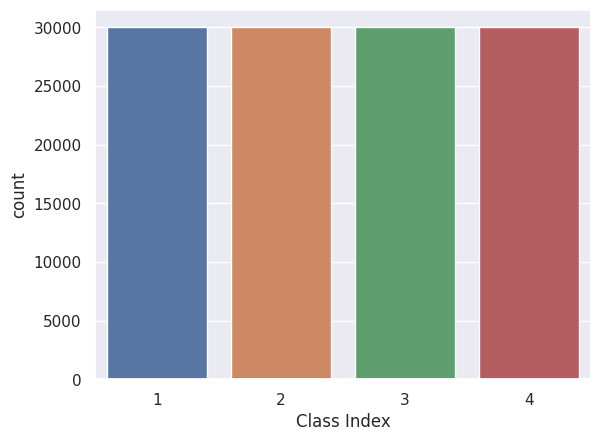

In [37]:
#ploting a count plot for train data
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")
sns.countplot(x="Class Index",  data=df_train,)
plt.show()

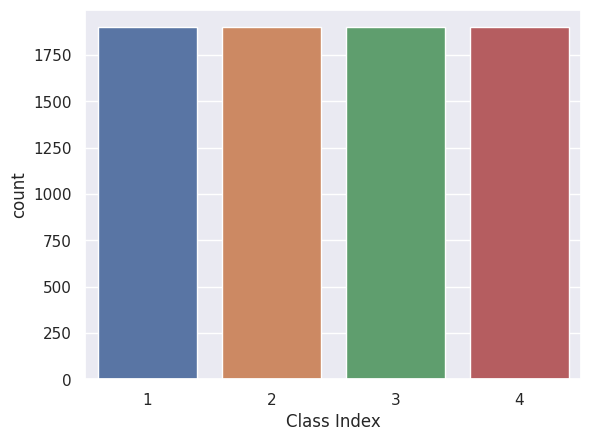

In [38]:
#ploting a count plot for test data
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")
sns.countplot(x="Class Index",  data=df_test)
plt.show()

In [39]:
df_train['title_length'] = df_train['Title'].apply(len) #caculating length of title train data 

In [40]:
df_train

,Class Index,Title,Description,labels,title_length
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",Business News,49
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,Business News,51
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,Business News,47
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,Business News,60
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",Business News,73
...,...,...,...,...,...
119954,1,Syria Redeploys Some Security Forces in Lebanon,"BEIRUT (Reuters) - Syria, under intense press...",World News,47
119955,1,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...,World News,50
119956,2,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...,Sports News,33
119957,2,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...,Sports News,31


<Axes: ylabel='Frequency'>

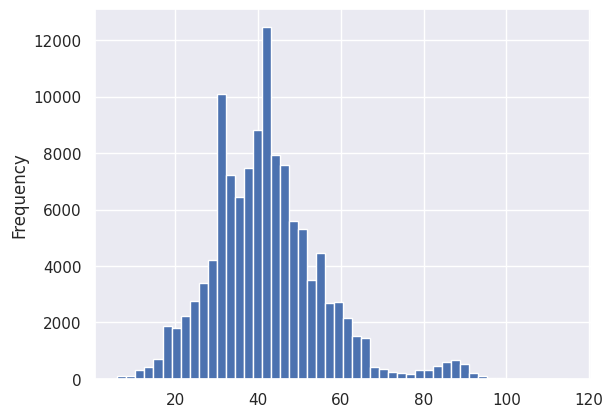

In [41]:
df_train['title_length'].plot(bins=50, kind='hist')  #histogram of title of train model

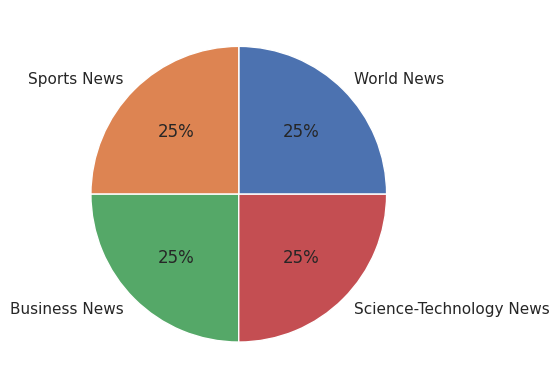

In [42]:
#pie chart of train data
labels = ['World News', 'Sports News', 'Business News', 'Science-Technology News']

plt.pie(a, labels = labels, autopct='%.0f%%')
plt.show()

In [43]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


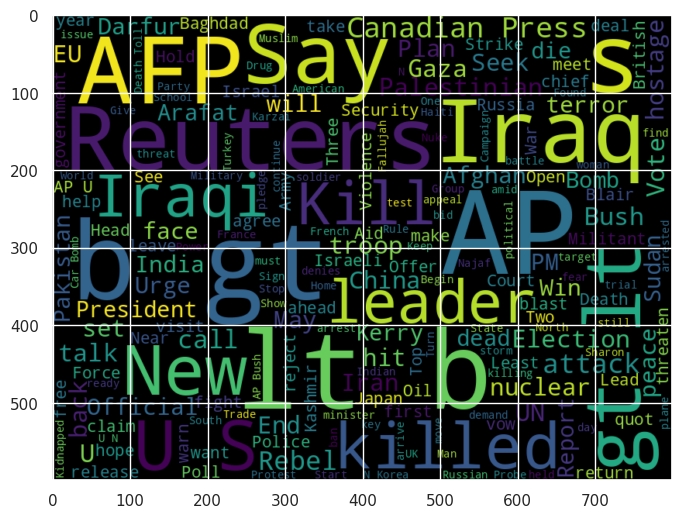

In [44]:
#creating a world cloud for each category
from wordcloud import WordCloud
def wordcloud_generator(words):
    wc= WordCloud(width=800,height=600,random_state=50,max_font_size=150).generate(words) #generating the words
    plt.figure(figsize=(8,8)) #size of figure
    plt.imshow(wc,interpolation='bilinear') 
    plt.show()
    

def word_category(labels):
    subset=df_train[df_train['labels']==labels] #determinng the columns required to predict
    texts=subset.Title.values
    words= ''.join(texts)
    wordcloud_generator(words)
    
word_category('World News') #enter here the category 

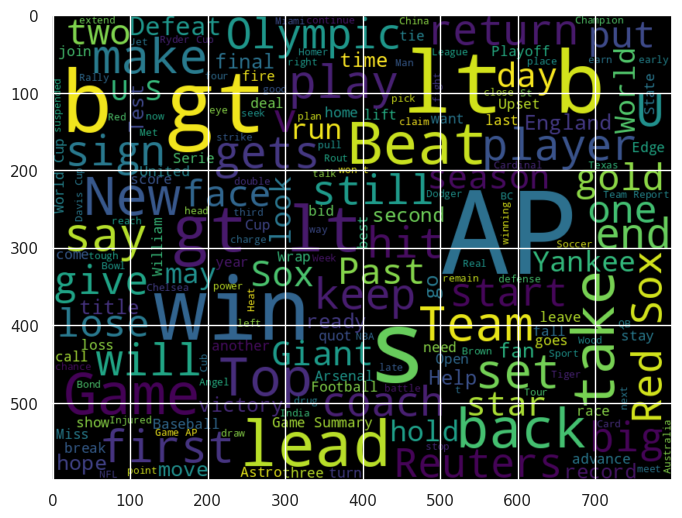

In [45]:
from wordcloud import WordCloud
def wordcloud_generator(words):
    wc= WordCloud(width=800,height=600,random_state=50,max_font_size=150).generate(words)
    plt.figure(figsize=(8,8))
    plt.imshow(wc,interpolation='bilinear')
    plt.show()
    

def word_category(labels):
    subset=df_train[df_train['labels']==labels] #determinng the columns required to predict
    texts=subset.Title.values
    words= ''.join(texts)
    wordcloud_generator(words)
    
word_category('Sports News') #enter here the category 

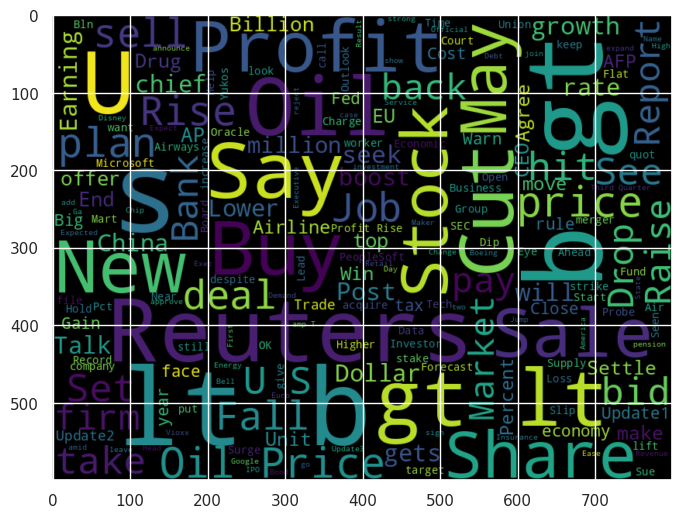

In [46]:
from wordcloud import WordCloud
def wordcloud_generator(words):
    wc= WordCloud(width=800,height=600,random_state=50,max_font_size=150).generate(words) #generating the words
    plt.figure(figsize=(8,8))
    plt.imshow(wc,interpolation='bilinear')
    plt.show()
    

def word_category(labels):
    subset=df_train[df_train['labels']==labels] #determinng the columns required to predict
    texts=subset.Title.values
    words= ''.join(texts)
    wordcloud_generator(words)
    
word_category('Business News') #enter here the category 

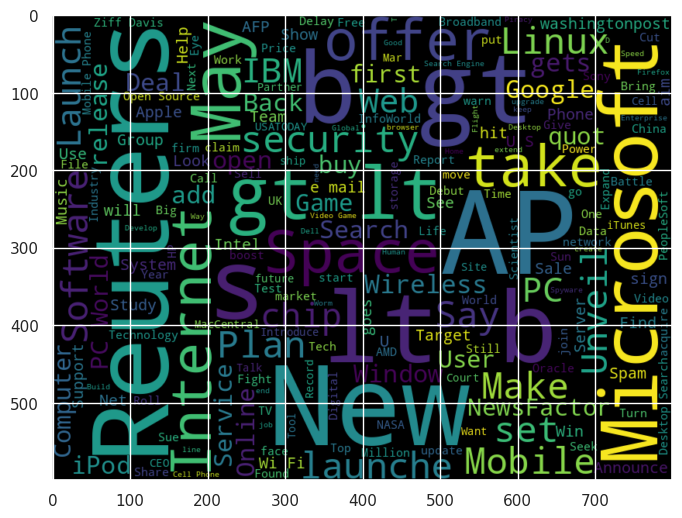

In [47]:
from wordcloud import WordCloud
def wordcloud_generator(words):
    wc= WordCloud(width=800,height=600,random_state=50,max_font_size=150).generate(words) #generating the words
    plt.figure(figsize=(8,8))
    plt.imshow(wc,interpolation='bilinear')
    plt.show()
    

def word_category(labels):
    subset=df_train[df_train['labels']==labels] #determinng the columns required to predict
    texts=subset.Title.values
    words= ''.join(texts)
    wordcloud_generator(words)
    
word_category('Science-Technology News') #enter here the category 

# Data Cleaning

In [48]:
#creating class to clean data
class fun:
    
    #converting into lower case
    def lower_order(self, text):
        return text.lower()
    
    #removing the urls
    def remove_urls(self,text):
        url_pattern = re.compile(r'https?://\S+|www\.\S+')
        return url_pattern.sub(r'', text)
    
    #removing the brackets 
    def remove_brackets(self,text):
        return re.sub(r'<[^>]+>', '', text)
    
    #removing the punctuation
    def remove_punctuation(self,text):
        additional_punctuation = ['#',"’", "“", "”", "-"]
        punctuation_to_remove = string.punctuation + ''.join(additional_punctuation)
        translator = str.maketrans('', '',punctuation_to_remove)

        # Use the translate method to remove punctuation
        text_without_punctuation = text.translate(translator)

        return text_without_punctuation

In [49]:
copy_class = fun()

In [50]:
df_train['Title'] = df_train['Title'].apply(copy_class.lower_order) #lowering the words
df_train['Title'] = df_train['Title'].apply(copy_class.remove_urls) #removing the urls
df_train['Title'] = df_train['Title'].apply(copy_class.remove_brackets) #removing the brackets
df_train['Title'] = df_train['Title'].apply(copy_class.remove_punctuation) #removing the puncuations

In [51]:
df_train['Description'] = df_train['Description'].apply(copy_class.lower_order) #lowering the words
df_train['Description'] = df_train['Description'].apply(copy_class.remove_urls) #removing the urls
df_train['Description'] = df_train['Description'].apply(copy_class.remove_brackets) #removing the brackets
df_train['Description'] = df_train['Description'].apply(copy_class.remove_punctuation) #removing the puncuations

In [52]:
df_test['Title'] = df_test['Title'].apply(copy_class.lower_order) #lowering the words
df_test['Title'] = df_test['Title'].apply(copy_class.remove_urls) #removing the urls
df_test['Title'] = df_test['Title'].apply(copy_class.remove_brackets) #removing the brackets
df_test['Title'] = df_test['Title'].apply(copy_class.remove_punctuation) #removing the puncuations

In [53]:
df_test['Description'] = df_test['Description'].apply(copy_class.lower_order) #lowering the words
df_test['Description'] = df_test['Description'].apply(copy_class.remove_urls) #removing the urls
df_test['Description'] = df_test['Description'].apply(copy_class.remove_brackets) #removing the brackets
df_test['Description'] = df_test['Description'].apply(copy_class.remove_punctuation) #removing the puncuations

In [54]:
df_train

,Class Index,Title,Description,labels,title_length
0,3,wall st bears claw back into the black reuters,reuters shortsellers wall streets dwindlingba...,Business News,49
1,3,carlyle looks toward commercial aerospace reuters,reuters private investment firm carlyle group...,Business News,51
2,3,oil and economy cloud stocks outlook reuters,reuters soaring crude prices plus worriesabou...,Business News,47
3,3,iraq halts oil exports from main southern pipe...,reuters authorities have halted oil exportflo...,Business News,60
4,3,oil prices soar to alltime record posing new m...,afp tearaway world oil prices toppling record...,Business News,73
...,...,...,...,...,...
119954,1,syria redeploys some security forces in lebanon,beirut reuters syria under intense pressure ...,World News,47
119955,1,pakistans musharraf says wont quit as army chief,karachi reuters pakistani president pervez m...,World News,50
119956,2,renteria signing a topshelf deal,red sox general manager theo epstein acknowled...,Sports News,33
119957,2,saban not going to dolphins yet,the miami dolphins will put their courtship of...,Sports News,31


In [55]:
df_test

,Class Index,Title,Description,labels
0,3,fears for t n pension after talks,unions representing workers at turner newall...,Business News
1,4,the race is on second private team sets launch...,spacecom toronto canada a secondteam of rock...,Science-Technology News
2,4,ky company wins grant to study peptides ap,ap a company founded by a chemistry researche...,Science-Technology News
3,4,prediction unit helps forecast wildfires ap,ap its barely dawn when mike fitzpatrick star...,Science-Technology News
4,4,calif aims to limit farmrelated smog ap,ap southern californias smogfighting agency w...,Science-Technology News
...,...,...,...,...
7595,1,around the world,ukrainian presidential candidate viktor yushch...,World News
7596,2,void is filled with clement,with the supply of attractive pitching options...,Sports News
7597,2,martinez leaves bitter,like roger clemens did almost exactly eight ye...,Sports News
7598,3,5 of arthritis patients in singapore take bext...,singapore doctors in the united states have w...,Business News


# Stop Words

In [56]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [57]:
import nltk

In [58]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [59]:
#displaying the stopwords
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [60]:
len(stop_words) 

179

In [61]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [62]:
def remove_stopwords(text):
    # Split the text into words
    words = text.split()
    
    # Remove stopwords
    filtered_words = [word for word in words if word.lower() not in stop_words]
    
    # Join the filtered words into a sentence
    filtered_text = ' '.join(filtered_words)
    
    return filtered_text

In [63]:
df_train["Title"] = df_train["Title"].apply(remove_stopwords)  #removing the stop words

In [64]:
df_test["Title"] = df_test["Title"].apply(remove_stopwords)  #removing the stop words

In [65]:
df_train["Description"] = df_train["Description"].apply(remove_stopwords) #removing the stop words

In [66]:
df_test["Description"] = df_test["Description"].apply(remove_stopwords) #removing the stop words

In [67]:
df_train

,Class Index,Title,Description,labels,title_length
0,3,wall st bears claw back black reuters,reuters shortsellers wall streets dwindlingban...,Business News,49
1,3,carlyle looks toward commercial aerospace reuters,reuters private investment firm carlyle groupw...,Business News,51
2,3,oil economy cloud stocks outlook reuters,reuters soaring crude prices plus worriesabout...,Business News,47
3,3,iraq halts oil exports main southern pipeline ...,reuters authorities halted oil exportflows mai...,Business News,60
4,3,oil prices soar alltime record posing new mena...,afp tearaway world oil prices toppling records...,Business News,73
...,...,...,...,...,...
119954,1,syria redeploys security forces lebanon,beirut reuters syria intense pressure quit leb...,World News,47
119955,1,pakistans musharraf says wont quit army chief,karachi reuters pakistani president pervez mus...,World News,50
119956,2,renteria signing topshelf deal,red sox general manager theo epstein acknowled...,Sports News,33
119957,2,saban going dolphins yet,miami dolphins put courtship lsu coach nick sa...,Sports News,31


In [68]:
df_test

,Class Index,Title,Description,labels
0,3,fears n pension talks,unions representing workers turner newall say ...,Business News
1,4,race second private team sets launch date huma...,spacecom toronto canada secondteam rocketeers ...,Science-Technology News
2,4,ky company wins grant study peptides ap,ap company founded chemistry researcher univer...,Science-Technology News
3,4,prediction unit helps forecast wildfires ap,ap barely dawn mike fitzpatrick starts shift b...,Science-Technology News
4,4,calif aims limit farmrelated smog ap,ap southern californias smogfighting agency we...,Science-Technology News
...,...,...,...,...
7595,1,around world,ukrainian presidential candidate viktor yushch...,World News
7596,2,void filled clement,supply attractive pitching options dwindling d...,Sports News
7597,2,martinez leaves bitter,like roger clemens almost exactly eight years ...,Sports News
7598,3,5 arthritis patients singapore take bextra cel...,singapore doctors united states warned painkil...,Business News


# Lemmantizations

In [69]:
!pip install spacy
!python -m spacy download en_core_web_sm

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 74.3 MB/s eta 0:00:0000:010:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [70]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [71]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nlp = spacy.load('en_core_web_sm')
lemmatizer = WordNetLemmatizer() #for words sperations only
def lemmatize_text(text):
    # Process the text using spaCy
    doc = nlp(text)
    
    # Lemmatize and return the results
    lemmatized_output = ' '.join([token.lemma_ for token in doc])
    return lemmatized_output

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df_train["Title"] = df_train["Title"].apply(lemmatize_text) #lemmantizing the words

In [ ]:
df_test["Title"] = df_test["Title"].apply(lemmatize_text) #lemmantizing the words

In [ ]:
df_test["Title"][0] #displying the 0 index of letters

In [ ]:
df_train["Title"][0]

# TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer  #importing Tfidfvectorizer

In [ ]:
vectorizer = TfidfVectorizer()

In [ ]:
words = vectorizer.fit_transform(df_train["Title"]) #fitting the tfidf function

In [ ]:
words = vectorizer.fit_transform(df_test["Title"])

In [ ]:
ac = df_train["Title"][100:200]

In [ ]:
word_set = [] #creating empty list
#accessing every words of the list that are present in 2D 
for sent in ac:
    for word in sent:
        if word not in word_set:
            word_set.append(word)

word_set = set(word_set)

index_dict = {}
i = 0
for word in word_set:
    index_dict[word] = i
    i += 1

In [ ]:
#counting the no of words 
def count_dict(ac):
    word_count = {}
    for word in word_set:
        word_count[word] = 0
        for sent in ac:
            if word in sent:
                word_count[word] += 1
    return word_count
 
word_count = count_dict(ac)

In [ ]:
#calculating the term frequency
def term_freqency(document, word):
    N = len(document)
    occurance_of_words = len([words for words in document if words == word])
    return occurance_of_words/N

In [ ]:
#calculating the inverse document frequency
def inverse_doc_frequency(word):
    try:
        word_occurance = word_count[word] + 1
    except:
        word_occurance = 1
    return np.log(len(ac)/word_occurance)

In [ ]:
def tf_idf(ac):
    tf_idf_vec = np.zeros((len(word_set),))
    for word in ac:
        tf = term_freqency(ac,word)
        idf = inverse_doc_frequency(word)
         
        value = tf*idf
        tf_idf_vec[index_dict[word]] = value 
    return tf_idf_vec

In [ ]:
vectors = []
for sent in ac:
    vec = tf_idf(sent)
    vectors.append(vec)
 
print(vectors[0])

# Determinging the test and train size

In [ ]:
X_train = df_train['Title'] #defining the X_train as train dataset
y_train = df_train['Class Index'].apply(lambda x: x-1).values #defining the y_train as train dataset

x_test = df_test['Title'] #defining the x_test as test dataset
y_test = df_test['Class Index'].apply(lambda x: x-1).values #defining the y_test as test dataset
maxlen = X_train.map(lambda x: len(x.split())).max() #calculating the maximum length of the title

## Creating tokenizations and pad sequences

In [ ]:
vocab_size = 10000 # arbitrarily chosen
embed_size = 32 # arbitrarily chosen

# Create and Fit tokenizer
tok = Tokenizer(num_words=vocab_size)
tok.fit_on_texts(X_train.values)

# Tokenize the data
X_train = tok.texts_to_sequences(X_train)
x_test = tok.texts_to_sequences(x_test)

# creating Pad data
X_train = pad_sequences(X_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

## Building LSTM model

In [ ]:
#bulding a LSTM model
model = Sequential()
model.add(Embedding(vocab_size, embed_size, input_length=maxlen)) #embedding layers
model.add(Bidirectional(LSTM(128, return_sequences=True))) #creating a bidirectional layers that means two way layear
model.add(Bidirectional(LSTM(64, return_sequences=True))) #creating a bidirectional layers that means two way layear
model.add(GlobalMaxPooling1D()) #creating a pooling layer
model.add(Dense(1024)) #creating a dense layer 
model.add(Dropout(0.25)) # creating a dropout layer 
model.add(Dense(512)) #creating a dense layer
model.add(Dropout(0.25)) # creating a dropout layer
model.add(Dense(256)) #creating a dense layer
model.add(Dropout(0.25)) # creating a dropout layer
model.add(Dense(128)) #creating a dense layer
model.add(Dropout(0.25)) # creating a dropout layer
model.add(Dense(64)) #creating a dense layer
model.add(Dropout(0.25)) # creating a dropout layer
model.add(Dense(4, activation='softmax')) #activating softmax function
model.summary() # displaying the whole summary of the model 

In [ ]:
callbacks = [
    EarlyStopping(     #EarlyStopping is used to stop at the epoch where val_accuracy does not improve significantly
        monitor='val_accuracy',
        min_delta=1e-4, #minimum change in the monitored quantity to qualify for improvement
        patience=4, #when 4 results are same the training of data automatically stops monitoring validation accuracy
        verbose=1
    ),
    ModelCheckpoint(
        filepath='weights.h5', #saves on weights.h5
        monitor='val_accuracy',  #checking only validation accucracy for patience
        mode='max', 
        save_best_only=True,
        save_weights_only=True,
        verbose=1
    )]

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', #Sparse Categorical Crossentropy Loss because data is not one-hot encoded
              optimizer='adam', #default learning rate 0.001
              metrics=['accuracy']) 

model.fit(X_train, 
          y_train, 
          batch_size=256, 
          validation_data=(x_test, y_test), #defining validation data set
          epochs=50, #50 the epochs
          callbacks=callbacks)

In [ ]:
test_loss,test_acc = model.evaluate(x_test,y_test,verbose= 2) #evaluating the accuracy and loss value

In [ ]:
preds = [np.argmax(i) for i in model.predict(x_test)] #predicting the test values

In [ ]:
#printing the accuracy, recall, and precision
print("Recall of the model is {:.2f}".format(recall_score(y_test, preds, average='micro')))
print("Precision of the model is {:.2f}".format(precision_score(y_test, preds, average='micro')))
print("Accuracy of the model is {:.2f}".format(accuracy_score(y_test, preds)))

In [ ]:
#predicting the category of the news
def modelDemo(news_text):

  #News Labels
  labels = ['World News', 'Sports News', 'Business News', 'Science-Technology News']

  test_seq = pad_sequences(tok.texts_to_sequences(news_text), maxlen=maxlen)

  test_preds = [labels[np.argmax(i)] for i in model.predict(test_seq)]

  for news, label in zip(news_text, test_preds):
      print('{} - {}'.format(news, label))

In [ ]:
modelDemo(['New evidence of virus risks from wildlife trade'])

In [ ]:
modelDemo(['Coronavirus: Bank pumps £100bn into UK economy to aid recovery'])

In [ ]:
modelDemo(['David Luiz’s future with Arsenal to be decided this week'])

In [ ]:
#printing confusion matrix
labels = ['World News', 'Sports News', 'Business News', 'Science-Technology News']
preds = [np.argmax(i) for i in model.predict(x_test)]
cm  = confusion_matrix(y_test, preds)
plt.figure()
plot_confusion_matrix(cm, figsize=(16,12), hide_ticks=True, cmap=plt.cm.Blues)
plt.xticks(range(4), labels, fontsize=12)
plt.yticks(range(4), labels, fontsize=12)
plt.show()

## SVM

In [ ]:
#building SVM model with help of pipeline 
text_clf_svm = Pipeline([('vect', CountVectorizer()),
                   ('tfidf', TfidfTransformer()),
                     ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',
                                           alpha=1e-3,random_state=42)),])

text_clf_svm = text_clf_svm.fit(df_train["Title"], df_train["Class Index"])
predicted_svm = text_clf_svm.predict(df_test["Title"])
np.mean(predicted_svm == df_test["Class Index"])

In [ ]:
#printing the accuracy, recall, and precision
print("Recall of the model is {:.2f}".format(recall_score(df_test["Class Index"], predicted_svm, average='micro')))
print("Precision of the model is {:.2f}".format(precision_score(df_test["Class Index"], predicted_svm, average='micro')))
print("Accuracy of the model is {:.2f}".format(accuracy_score(df_test["Class Index"], predicted_svm)))

In [ ]:
#printing confusion matrix
labels = ['World News', 'Sports News', 'Business News', 'Science-Technology News']
preds = [np.argmax(i) for i in model.predict(x_test)]
cm  = confusion_matrix(df_test["Class Index"],predicted_svm)
plt.figure()
plot_confusion_matrix(cm, figsize=(16,12), hide_ticks=True, cmap=plt.cm.Blues)
plt.xticks(range(4), labels, fontsize=12)
plt.yticks(range(4), labels, fontsize=12)
plt.show()


## Logistric Regression 

In [ ]:
# building Logostic Regression model with help of pipeline 
logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=-1, C=0.1,max_iter=5000)),
               ])
logreg=logreg.fit(df_train["Title"], df_train["Class Index"])
predicted_logreg = logreg.predict(df_test["Title"])
np.mean(predicted_logreg ==  df_test["Class Index"])

In [ ]:
#printing the accuracy, recall, and precision
print("Recall of the model is {:.2f}".format(recall_score(df_test["Class Index"], predicted_logreg, average='micro')))
print("Precision of the model is {:.2f}".format(precision_score(df_test["Class Index"], predicted_logreg, average='micro')))
print("Accuracy of the model is {:.2f}".format(accuracy_score(df_test["Class Index"], predicted_logreg)))

In [ ]:
#printing confusion matrix
labels = ['World News', 'Sports News', 'Business News', 'Science-Technology News']
preds = [np.argmax(i) for i in model.predict(x_test)]
cm  = confusion_matrix(df_test["Class Index"],predicted_logreg)
plt.figure()
plot_confusion_matrix(cm, figsize=(16,12), hide_ticks=True, cmap=plt.cm.Blues)
plt.xticks(range(4), labels, fontsize=12)
plt.yticks(range(4), labels, fontsize=12)
plt.show()

## Random Forest Classification

In [ ]:
classifier = RandomForestClassifier(n_estimators=1000 ,criterion='entropy' , random_state=42).fit(X_train, y_train)
classifier
y_pred = classifier.predict(x_test)

In [ ]:
print("The accuracy is : ", accuracy_score(y_test,y_pred )) #printing accuracy

In [ ]:
print("The precision is : ", precision_score(y_test,y_pred,average='weighted' )) #printing precision

In [ ]:
print("The recall is : ", recall_score(y_test,y_pred,average='weighted' )) #printing recall

In [ ]:
#displaying the confusion matrix
labels = ['World News', 'Sports News', 'Business News', 'Science-Technology News']
preds = [np.argmax(i) for i in model.predict(x_test)]
cm  = confusion_matrix(df_test["Class Index"],y_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(16,12), hide_ticks=True, cmap=plt.cm.Blues)
plt.xticks(range(4), labels, fontsize=12)
plt.yticks(range(4), labels, fontsize=12)
plt.show()